In [1]:
#Data loading and data refinement
from IPython.display import Image

import numpy as np
import matplotlib.pyplot as plt
import scipy 
from scipy.interpolate import CubicSpline

In [2]:
data = np.loadtxt('calcite.txt')

data=np.array(data)

In [3]:
#Load data for bulk

xvals=[]

yvals=[]

for i in range(0,data.shape[0]):
    xvals.append(data[i][0])

    
for i in range(0,data.shape[0]):
    yvals.append(data[i][1])



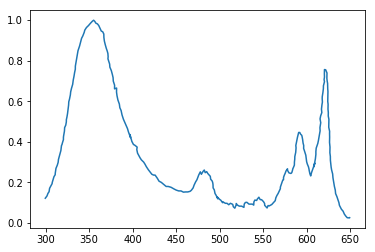

In [4]:
plt.plot(xvals,yvals)

In [22]:
#Considering excitations from the conduction band, heavy hole band and light hole band
#Empirical maxima(nm)

lambda_c= 355.0
lambda_lh=592.0
lambda_hh=619.0

In [23]:
#Effective mass calculations assuming this is the lowest excited state

In [26]:
import skimage
from skimage import io

#Parameters
h= 4.1357*10e-15
R_eff=2.8e-6
c=2.99792458e+17
alpha_01=2.4048

0.4783235944373586

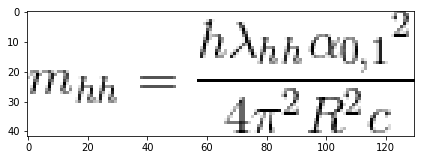

In [27]:
img=io.imread('CodeCogsEqn-2.gif')
io.imshow(img)

#effective mass of heavy hole
m_hh=(h*lambda_hh*(alpha_01**2))/(4*(np.pi)**2*(R_eff**2))

m_hh

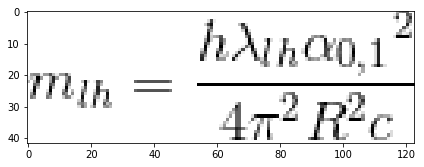

In [28]:
img=io.imread('CodeCogsEqn-3.gif')
io.imshow(img)

#effective mass of heavy hole
m_lh=(h*lambda_lh*(alpha_01**2))/(4*(np.pi)**2*(R_eff**2))

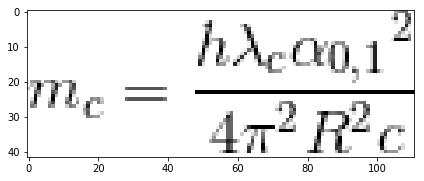

In [29]:
img=io.imread('CodeCogsEqn.gif')
io.imshow(img)

#effective mass of heavy hole
m_c=(h*lambda_c*(alpha_01**2))/(4*(np.pi)**2*(R_eff**2))